# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [84]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('F:/aai/code/Assignments_DonorsChoose_2018/donors dataset/train_data_sample3.csv')
resource_data = pd.read_csv('F:/aai/code/Assignments_DonorsChoose_2018/donors dataset/resources_data_sample3.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (10001, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (10035, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  price
0  p220176  Hatchet - Character Activity for Ch 1-3 eLesso...       1.0   1.99
1  p220176  Hatchet - Context Clues Activity for Ch 1-3 eL...       1.0   1.99

# 1.2 Data Analysis

Number of projects thar are approved for funding  8431 , ( 84.3015698430157 %)
Number of projects thar are not approved for funding  1570 , ( 15.698430156984303 %)


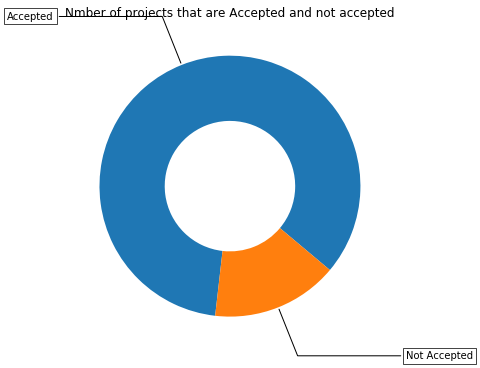

In [5]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [6]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [7]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
26         MT       0.708333
2          AR       0.712500
0          AK       0.733333
28         ND       0.733333
48         WI       0.793296
States with highest % approvals
   state_code  num_proposals
30         NH       0.891892
6          CT       0.894366
39         RI       0.900000
41         SD       0.928571
46         VT       1.000000


In [8]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [9]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

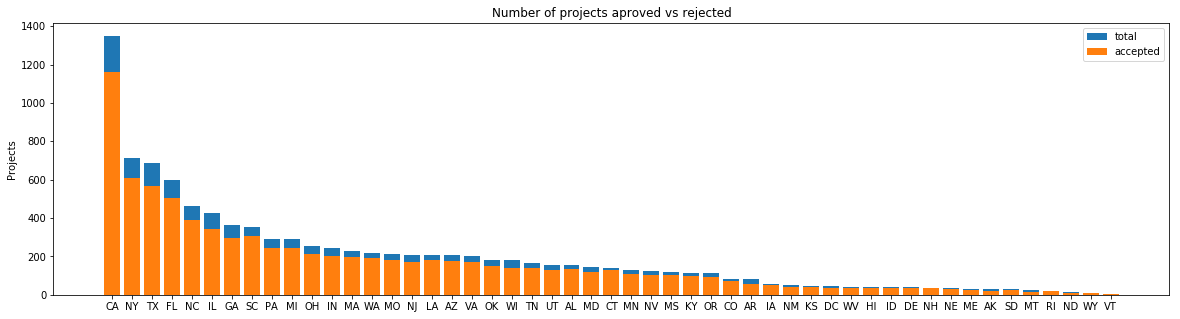

   school_state  project_is_approved  total       Avg
4            CA                 1163   1349  0.862120
34           NY                  610    715  0.853147
43           TX                  565    686  0.823615
9            FL                  504    600  0.840000
27           NC                  390    465  0.838710
   school_state  project_is_approved  total       Avg
26           MT                   17     24  0.708333
39           RI                   18     20  0.900000
28           ND                   11     15  0.733333
50           WY                    7      8  0.875000
46           VT                    4      4  1.000000


In [10]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

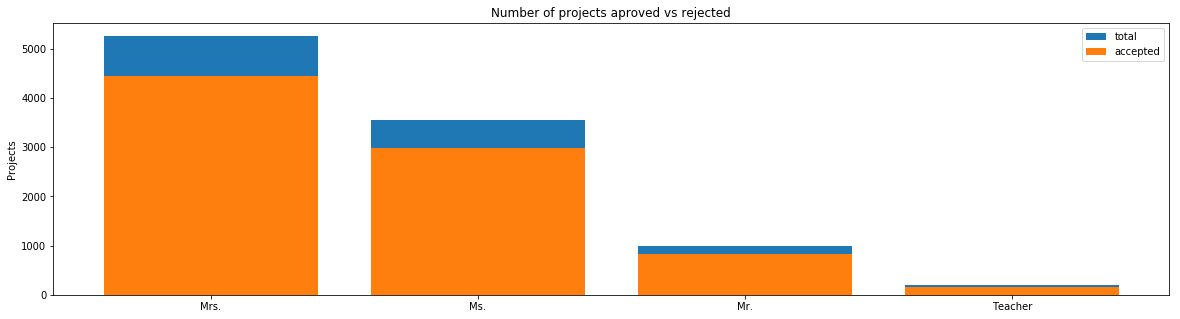

  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 4453   5262  0.846256
2            Ms.                 2989   3558  0.840079
0            Mr.                  831    987  0.841945
3        Teacher                  158    194  0.814433
  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 4453   5262  0.846256
2            Ms.                 2989   3558  0.840079
0            Mr.                  831    987  0.841945
3        Teacher                  158    194  0.814433


In [11]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

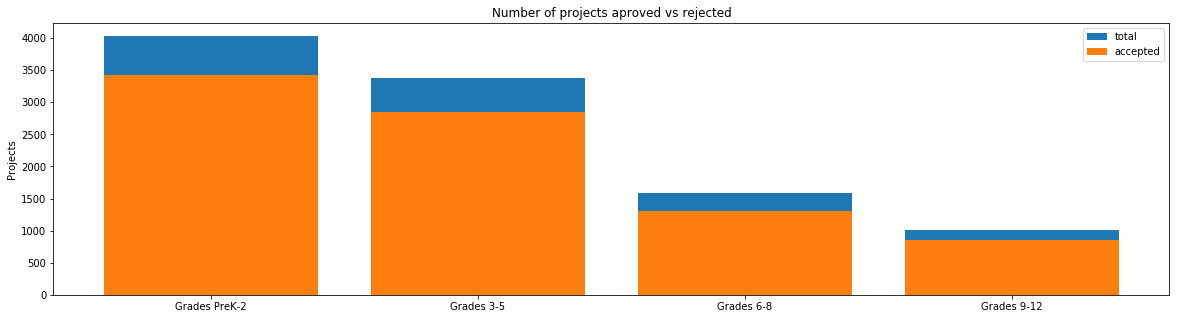

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 3424   4033  0.848996
0             Grades 3-5                 2845   3376  0.842713
1             Grades 6-8                 1312   1584  0.828283
2            Grades 9-12                  850   1008  0.843254
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 3424   4033  0.848996
0             Grades 3-5                 2845   3376  0.842713
1             Grades 6-8                 1312   1584  0.828283
2            Grades 9-12                  850   1008  0.843254


In [12]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [13]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [14]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0       29918  p068148  389040a25e03d92b43a8be6c11da1092           Mrs.   
1      130217  p015385  7a1c228f2fe49ca1f57fb5d8f0337170            Ms.   

  school_state  project_submitted_datetime project_grade_category  \
0           MA                 42600.79046          Grades PreK-2   
1           NC                 42563.88520          Grades PreK-2   

            project_subject_subcategories  \
0  Applied Sciences, Literature & Writing   
1                   Literacy, Mathematics   

                                       project_title  \
0  Science Notebooks: A Place To Show What We Are...   
1                                       Morning Work   

                                     project_essay_1  \
0  I teach science to children ages 3 to 11 in a ...   
1  I teach Kindergarten at a tiny school in the W...   

                                     project_essay_2 project_essay_3  \
0  These bound notebooks serve several purposes. ...             NaN   
1  Students at my school begin coming into the cl...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need science notebooks to organize...   
1             NaN  My students need materials needed to put toget...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             4                    1   
1                                             1                    0   

                 clean_categories  
0  Math_Science Literacy_Language  
1  Literacy_Language Math_Science

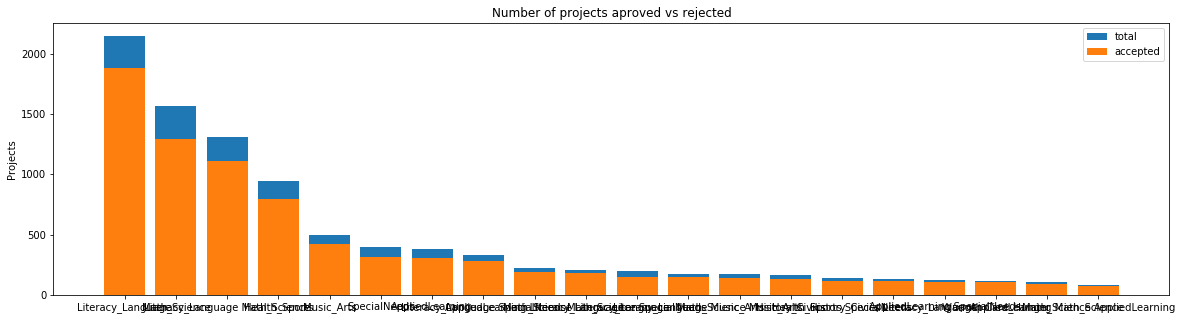

                  clean_categories  project_is_approved  total       Avg
23               Literacy_Language                 1876   2145  0.874592
30                    Math_Science                 1293   1567  0.825144
27  Literacy_Language Math_Science                 1107   1311  0.844394
8                    Health_Sports                  793    943  0.840933
38                      Music_Arts                  422    498  0.847390
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                  116    129  0.899225
6       AppliedLearning SpecialNeeds                  103    120  0.858333
47                Warmth Care_Hunger                  106    114  0.929825
4       AppliedLearning Math_Science                   89    105  0.847619
31      Math_Science AppliedLearning                   72     84  0.857143


In [15]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [16]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

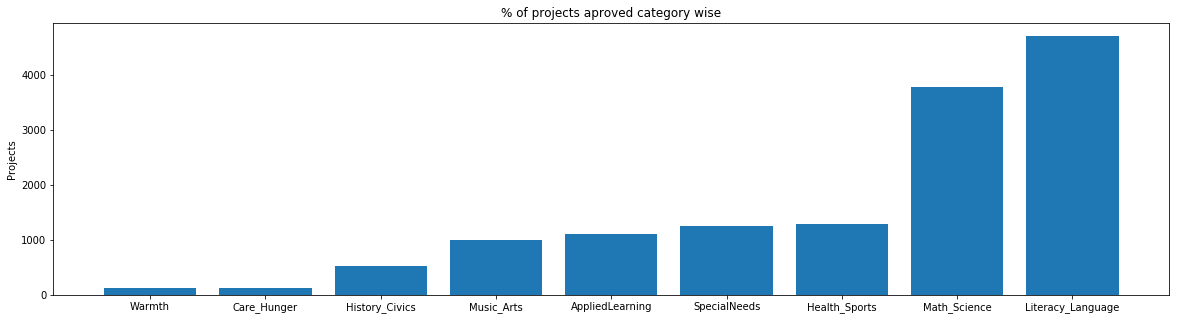

In [17]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [18]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :       120
Care_Hunger          :       120
History_Civics       :       526
Music_Arts           :      1007
AppliedLearning      :      1103
SpecialNeeds         :      1246
Health_Sports        :      1297
Math_Science         :      3785
Literacy_Language    :      4713


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [19]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [20]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0       29918  p068148  389040a25e03d92b43a8be6c11da1092           Mrs.   
1      130217  p015385  7a1c228f2fe49ca1f57fb5d8f0337170            Ms.   

  school_state  project_submitted_datetime project_grade_category  \
0           MA                 42600.79046          Grades PreK-2   
1           NC                 42563.88520          Grades PreK-2   

                                       project_title  \
0  Science Notebooks: A Place To Show What We Are...   
1                                       Morning Work   

                                     project_essay_1  \
0  I teach science to children ages 3 to 11 in a ...   
1  I teach Kindergarten at a tiny school in the W...   

                                     project_essay_2 project_essay_3  \
0  These bound notebooks serve several purposes. ...             NaN   
1  Students at my school begin coming into the cl...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need science notebooks to organize...   
1             NaN  My students need materials needed to put toget...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             4                    1   
1                                             1                    0   

                 clean_categories                 clean_subcategories  
0  Math_Science Literacy_Language  AppliedSciences Literature_Writing  
1  Literacy_Language Math_Science                Literacy Mathematics

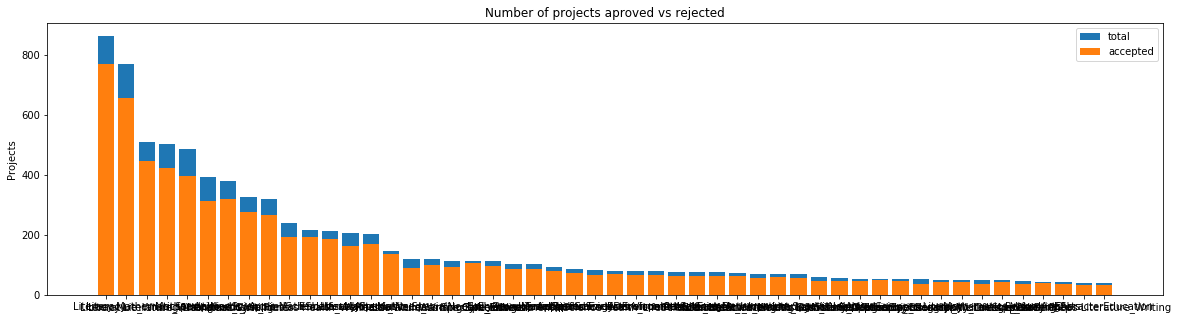

                clean_subcategories  project_is_approved  total       Avg
223                        Literacy                  770    863  0.892236
225            Literacy Mathematics                  657    770  0.853247
224     Literacy Literature_Writing                  446    509  0.876228
236  Literature_Writing Mathematics                  423    504  0.839286
244                     Mathematics                  398    485  0.820619
                    clean_subcategories  project_is_approved  total       Avg
59                   College_CareerPrep                   35     45  0.777778
275                      PerformingArts                   40     44  0.909091
97                                  ESL                   35     43  0.813953
14   AppliedSciences Literature_Writing                   34     40  0.850000
25                   CharacterEducation                   32     38  0.842105


In [21]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [22]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

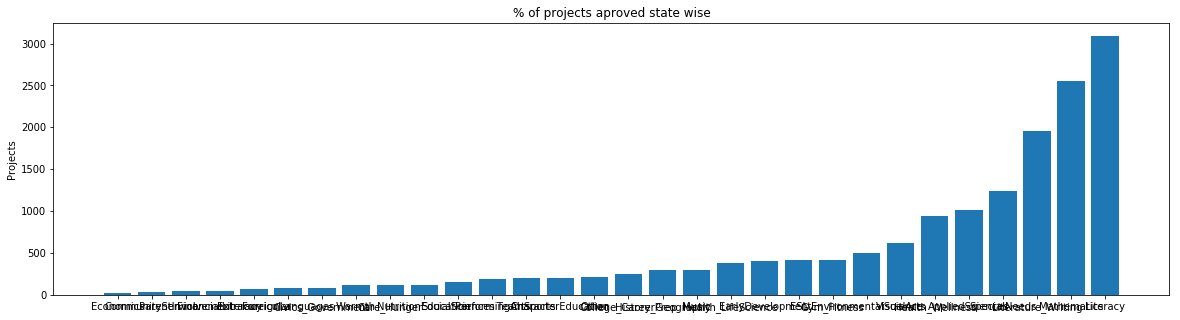

In [23]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [24]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :        25
CommunityService     :        35
ParentInvolvement    :        45
FinancialLiteracy    :        48
Extracurricular      :        66
ForeignLanguages     :        78
Civics_Government    :        81
Warmth               :       120
Care_Hunger          :       120
NutritionEducation   :       120
SocialSciences       :       153
PerformingArts       :       188
TeamSports           :       197
CharacterEducation   :       198
Other                :       209
College_CareerPrep   :       247
History_Geography    :       296
Music                :       299
Health_LifeScience   :       384
EarlyDevelopment     :       405
ESL                  :       419
Gym_Fitness          :       419
EnvironmentalScience :       500
VisualArts           :       621
Health_Wellness      :       941
AppliedSciences      :      1008
SpecialNeeds         :      1246
Literature_Writing   :      1959
Mathematics          :      2559
Literacy             :      3090


### 1.2.6 Univariate Analysis: Text features (Title)

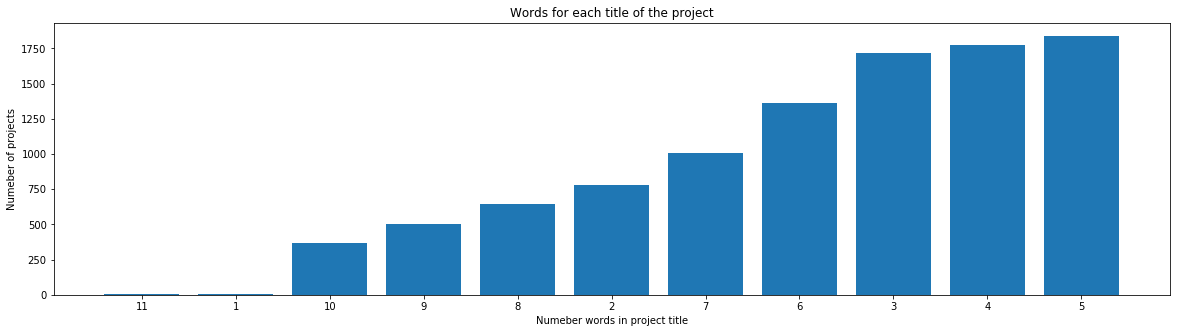

In [25]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [26]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

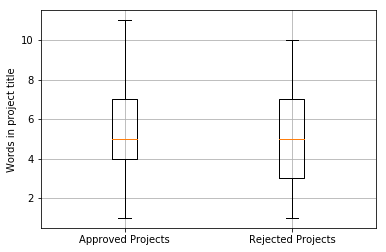

In [27]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

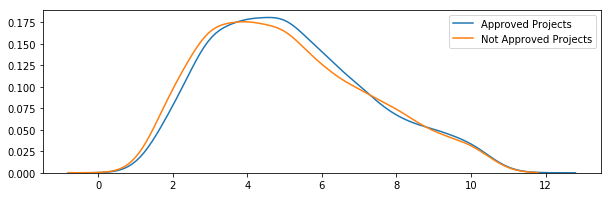

In [28]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [29]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [30]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

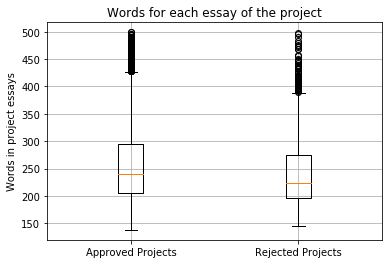

In [31]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

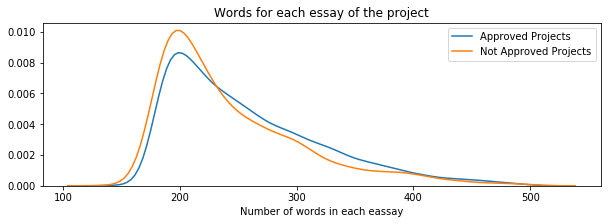

In [32]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [33]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  price
0  p220176  Hatchet - Character Activity for Ch 1-3 eLesso...       1.0   1.99
1  p220176  Hatchet - Context Clues Activity for Ch 1-3 eL...       1.0   1.99

In [34]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000052  114.98       2.0
1  p000298   66.97       5.0

In [35]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [36]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

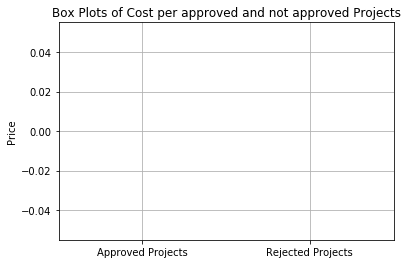

In [37]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

In [38]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        nan        |          nan          |
|     5      |        nan        |          nan          |
|     10     |        nan        |          nan          |
|     15     |        nan        |          nan          |
|     20     |        nan        |          nan          |
|     25     |        nan        |          nan          |
|     30     |        nan        |          nan          |
|     35     |        nan        |          nan          |
|     40     |        nan        |          nan          |
|     45     |        nan        |          nan          |
|     50     |        nan        |          nan          |
|     55     |        nan        |          nan          |
|     60     |        nan        |          nan          |
|     65     |        nan        |          nan         

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

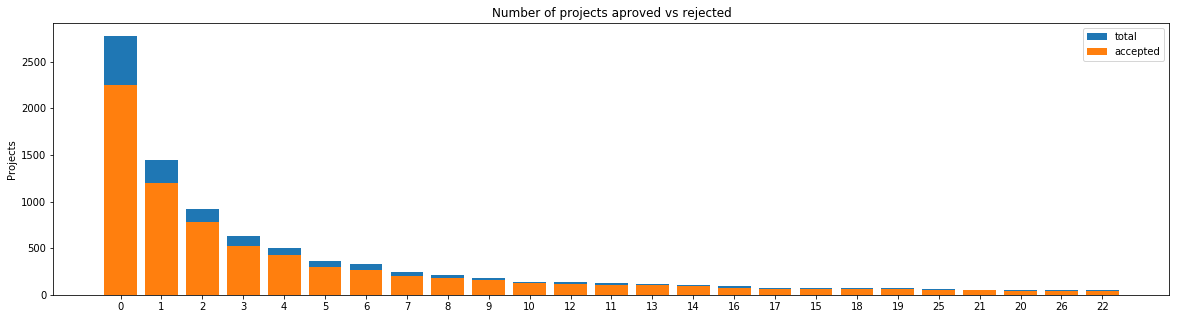

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                 2245   2775   
1                                             1                 1202   1450   
2                                             2                  779    921   
3                                             3                  524    628   
4                                             4                  426    500   

        Avg  
0  0.809009  
1  0.828966  
2  0.845820  
3  0.834395  
4  0.852000  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
25                                            25                   52     57   
21                                            21                   47     56   
20                                            20                   46     55   
26                                            26                   44     55   
22                                       

In [39]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=25)

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [40]:
project_resource_summary = list(project_data['project_resource_summary'].values)

proj_res_summary = []

for i in project_resource_summary:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split():
            j=j.replace('The','')
        j = j.replace(' ','')
        temp +=j.strip() + " "
        temp = temp.replace('&','_')
    proj_res_summary.append(temp.strip())

In [41]:
project_data['proj_res_summary'] = project_resource_summary
project_data.drop(['project_resource_summary'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0       29918  p068148  389040a25e03d92b43a8be6c11da1092           Mrs.   
1      130217  p015385  7a1c228f2fe49ca1f57fb5d8f0337170            Ms.   

  school_state  project_submitted_datetime project_grade_category  \
0           MA                 42600.79046          Grades PreK-2   
1           NC                 42563.88520          Grades PreK-2   

                                       project_title  \
0  Science Notebooks: A Place To Show What We Are...   
1                                       Morning Work   

                                     project_essay_1  \
0  I teach science to children ages 3 to 11 in a ...   
1  I teach Kindergarten at a tiny school in the W...   

                                     project_essay_2 project_essay_3  \
0  These bound notebooks serve several purposes. ...             NaN   
1  Students at my school begin coming into the cl...             NaN   

  project_essay_4  teacher_number_of_previously_posted_projects  \
0             NaN                                             4   
1             NaN                                             1   

   project_is_approved                clean_categories  \
0                    1  Math_Science Literacy_Language   
1                    0  Literacy_Language Math_Science   

                  clean_subcategories  \
0  AppliedSciences Literature_Writing   
1                Literacy Mathematics   

                                               essay  price  quantity  \
0  I teach science to children ages 3 to 11 in a ...    NaN       NaN   
1  I teach Kindergarten at a tiny school in the W...    NaN       NaN   

                                    proj_res_summary  
0  My students need science notebooks to organize...  
1  My students need materials needed to put toget...

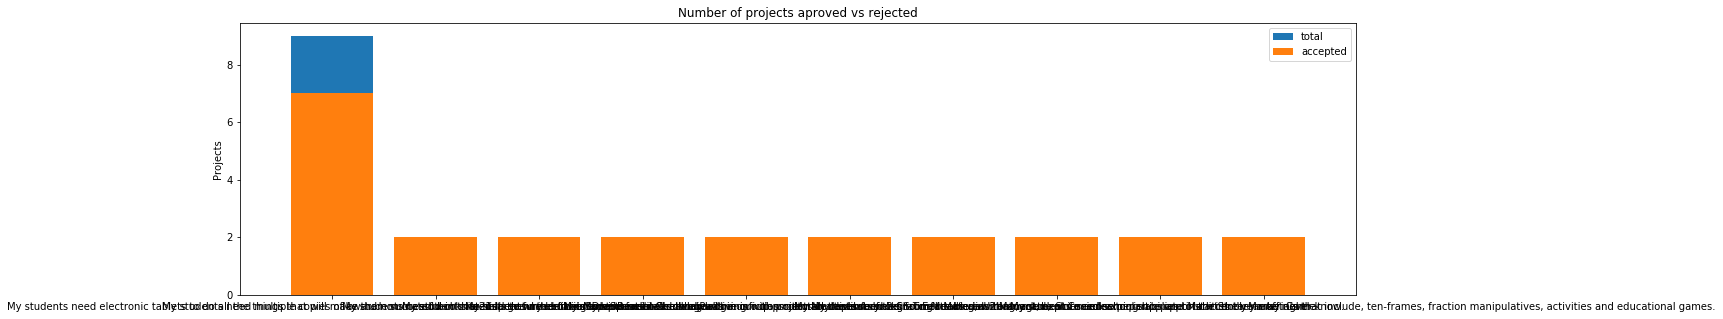

                                       proj_res_summary  project_is_approved  \
5215  My students need electronic tablets to do all ...                    7   
7096  My students need multiple copies of award nomi...                    2   
8452  My students need tech materials to further the...                    2   
6527  My students need large whiteboards to help fac...                    2   
5372  My students need fiction Dr. Seuss books along...                    2   

      total       Avg  
5215      9  0.777778  
7096      2  1.000000  
8452      2  1.000000  
6527      2  1.000000  
5372      2  1.000000  
                                       proj_res_summary  project_is_approved  \
9645  My students need two iPad minis with protectiv...                    2   
907   My students need Chromebooks in our classroom ...                    2   
146   My students need 2 Chromebooks and 2 Managemen...                    2   
7773  My students need school supplies to start the ...

In [42]:
univariate_barplots(project_data, 'proj_res_summary', 'project_is_approved', top=10)

** Observation **

As evident in the graph, the presence of numerical digits in resource summary does not really matter acceptance criteria

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [43]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0       29918  p068148  389040a25e03d92b43a8be6c11da1092           Mrs.   
1      130217  p015385  7a1c228f2fe49ca1f57fb5d8f0337170            Ms.   

  school_state  project_submitted_datetime project_grade_category  \
0           MA                 42600.79046          Grades PreK-2   
1           NC                 42563.88520          Grades PreK-2   

                                       project_title  \
0  Science Notebooks: A Place To Show What We Are...   
1                                       Morning Work   

                                     project_essay_1  \
0  I teach science to children ages 3 to 11 in a ...   
1  I teach Kindergarten at a tiny school in the W...   

                                     project_essay_2 project_essay_3  \
0  These bound notebooks serve several purposes. ...             NaN   
1  Students at my school begin coming into the cl...             NaN   

  project_essay_4  teacher_number_of_previously_posted_projects  \
0             NaN                                             4   
1             NaN                                             1   

   project_is_approved                clean_categories  \
0                    1  Math_Science Literacy_Language   
1                    0  Literacy_Language Math_Science   

                  clean_subcategories  \
0  AppliedSciences Literature_Writing   
1                Literacy Mathematics   

                                               essay  price  quantity  \
0  I teach science to children ages 3 to 11 in a ...    NaN       NaN   
1  I teach Kindergarten at a tiny school in the W...    NaN       NaN   

                                    proj_res_summary  
0  My students need science notebooks to organize...  
1  My students need materials needed to put toget...

In [44]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[3000])
print("="*50)
print(project_data['essay'].values[7000])
print("="*50)


I teach science to children ages 3 to 11 in a title 1 school in Boston. Many students are learning english as a second language. 15% of my students have identified specials needs.  Science is a favorite subject as the curriculum provides opportunity to learn by doing through hands-on experiences. We take care of live animals such as fish, mealworms, crayfish, and bess beetles. We grow food from seeds including string beans, potatoes and cherry tomatoes. We mark the beginning of Spring by watching for the bulbs we planted in the fall emerge as colorful tulips. \r\n\r\nAs budding scientists, my students are excited to capture their observations and share their learning. While many students struggle with their writing they love to draw and find ways to capture their learning in their drawings.  They love using tools like magnifying glasses and microscopes to see artifacts up close. They love using colored pencils and markers to draw the animals and plants in our classroom and in our outdo

In [45]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [46]:
sent = decontracted(project_data['essay'].values[10000])
print(sent)
print("="*50)

John B. Wright is an amazing place to work. We have students from all over the world at our school. We have 18 different languages spoken and students from 33 different countries. Our school has 99% free and reduced lunch and most of the children live in the neighboring community of apartments and trailer parks. Our Title 1 STEM (Science, Technology, Engineering, and Mathematics) school focuses on the whole child and giving them all of the opportunities that we can while they are with us. \r\n\r\nThe motto of my classroom is \"Be the somebody who makes everybody feel like a somebody.\"Organization is key to effective teaching. Pencil boxes and composition notebooks will help my students stay organized and engaged.  \r\nMy students will be using their notebooks during math and literacy time by making interactive notebooks that they can take home to help them study. \r\nThe pencil box will be the home to their supplies as well as their unfinished cut and pastes.  In my classroom we also 

In [47]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

John B. Wright is an amazing place to work. We have students from all over the world at our school. We have 18 different languages spoken and students from 33 different countries. Our school has 99% free and reduced lunch and most of the children live in the neighboring community of apartments and trailer parks. Our Title 1 STEM (Science, Technology, Engineering, and Mathematics) school focuses on the whole child and giving them all of the opportunities that we can while they are with us.     The motto of my classroom is  Be the somebody who makes everybody feel like a somebody. Organization is key to effective teaching. Pencil boxes and composition notebooks will help my students stay organized and engaged.    My students will be using their notebooks during math and literacy time by making interactive notebooks that they can take home to help them study.   The pencil box will be the home to their supplies as well as their unfinished cut and pastes.  In my classroom we also do a class

In [48]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

John B Wright is an amazing place to work We have students from all over the world at our school We have 18 different languages spoken and students from 33 different countries Our school has 99 free and reduced lunch and most of the children live in the neighboring community of apartments and trailer parks Our Title 1 STEM Science Technology Engineering and Mathematics school focuses on the whole child and giving them all of the opportunities that we can while they are with us The motto of my classroom is Be the somebody who makes everybody feel like a somebody Organization is key to effective teaching Pencil boxes and composition notebooks will help my students stay organized and engaged My students will be using their notebooks during math and literacy time by making interactive notebooks that they can take home to help them study The pencil box will be the home to their supplies as well as their unfinished cut and pastes In my classroom we also do a classroom economy The students ha

In [49]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [50]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████| 10001/10001 [00:10<00:00, 923.76it/s]


In [51]:
# after preprocesing
preprocessed_essays[10000]

'john b wright amazing place work we students world school we 18 different languages spoken students 33 different countries our school 99 free reduced lunch children live neighboring community apartments trailer parks our title 1 stem science technology engineering mathematics school focuses whole child giving opportunities us the motto classroom be somebody makes everybody feel like somebody organization key effective teaching pencil boxes composition notebooks help students stay organized engaged my students using notebooks math literacy time making interactive notebooks take home help study the pencil box home supplies well unfinished cut pastes in classroom also classroom economy the students jobs get paid job students collect money based various things happen throughout day the pencil boxes also effective tool help students responsible money the pencil sharpener help transitions go smoother sharpener works quietly quickly nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [52]:
# similarly you can preprocess the titles also

project_title = list(project_data['project_title'].values)

clean_project_title = []

for i in project_title:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split():
            j=j.replace('The','')
        j = j.replace(' ','')
        temp +=j.strip() + " "
        temp = temp.replace('&','_')
    clean_project_title.append(temp.strip())

In [53]:
project_data['clean_project_title'] = clean_project_title
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0       29918  p068148  389040a25e03d92b43a8be6c11da1092           Mrs.   
1      130217  p015385  7a1c228f2fe49ca1f57fb5d8f0337170            Ms.   

  school_state  project_submitted_datetime project_grade_category  \
0           MA                 42600.79046          Grades PreK-2   
1           NC                 42563.88520          Grades PreK-2   

                                     project_essay_1  \
0  I teach science to children ages 3 to 11 in a ...   
1  I teach Kindergarten at a tiny school in the W...   

                                     project_essay_2 project_essay_3  \
0  These bound notebooks serve several purposes. ...             NaN   
1  Students at my school begin coming into the cl...             NaN   

  project_essay_4  teacher_number_of_previously_posted_projects  \
0             NaN                                             4   
1             NaN                                             1   

   project_is_approved                clean_categories  \
0                    1  Math_Science Literacy_Language   
1                    0  Literacy_Language Math_Science   

                  clean_subcategories  \
0  AppliedSciences Literature_Writing   
1                Literacy Mathematics   

                                               essay  price  quantity  \
0  I teach science to children ages 3 to 11 in a ...    NaN       NaN   
1  I teach Kindergarten at a tiny school in the W...    NaN       NaN   

                                    proj_res_summary  \
0  My students need science notebooks to organize...   
1  My students need materials needed to put toget...   

                               clean_project_title  
0  ScienceNotebooks:APlaceToShowWhatWeAreLearning!  
1                                      MorningWork

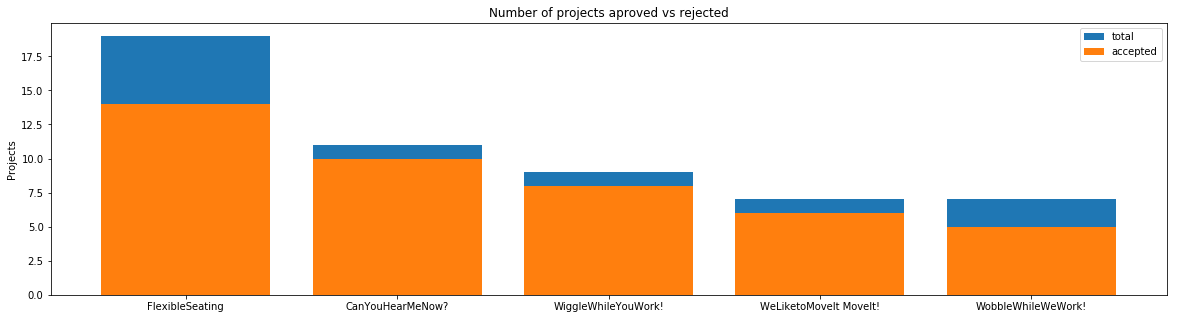

         clean_project_title  project_is_approved  total       Avg
2874         FlexibleSeating                   14     19  0.736842
1299        CanYouHearMeNow?                   10     11  0.909091
9237     WiggleWhileYouWork!                    8      9  0.888889
8976  WeLiketoMoveIt MoveIt!                    6      7  0.857143
9358      WobbleWhileWeWork!                    5      7  0.714286
         clean_project_title  project_is_approved  total       Avg
2874         FlexibleSeating                   14     19  0.736842
1299        CanYouHearMeNow?                   10     11  0.909091
9237     WiggleWhileYouWork!                    8      9  0.888889
8976  WeLiketoMoveIt MoveIt!                    6      7  0.857143
9358      WobbleWhileWeWork!                    5      7  0.714286


In [54]:
univariate_barplots(project_data, 'clean_project_title', 'project_is_approved', top=5)

## 1. 4 Preparing data for models

In [55]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'price', 'quantity', 'proj_res_summary',
       'clean_project_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [56]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (10001, 9)


In [57]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'ParentInvolvement', 'FinancialLiteracy', 'Extracurricular', 'ForeignLanguages', 'Civics_Government', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'SocialSciences', 'PerformingArts', 'TeamSports', 'CharacterEducation', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (10001, 30)


** Please do the similar feature encoding with state, teacher_prefix and project_grade_category also **

In [58]:
# feature encoding for school state

my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matric after one hot encoding", state_one_hot.shape)

['VT', 'WY', 'ND', 'RI', 'MT', 'SD', 'AK', 'ME', 'NE', 'NH', 'DE', 'ID', 'HI', 'WV', 'DC', 'KS', 'NM', 'IA', 'AR', 'CO', 'OR', 'KY', 'MS', 'NV', 'MN', 'CT', 'MD', 'AL', 'UT', 'TN', 'WI', 'OK', 'VA', 'AZ', 'LA', 'NJ', 'MO', 'WA', 'MA', 'IN', 'OH', 'MI', 'PA', 'SC', 'GA', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matric after one hot encoding (10001, 51)


In [59]:
# feature encoding for teacher prefix

my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())
    
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matric after one hot encoding", teacher_prefix_one_hot.shape)

['Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matric after one hot encoding (10001, 4)


In [60]:
# feature encoding for project grade category

my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
    
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())

project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matric after one hot encoding", project_grade_category_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matric after one hot encoding (10001, 5)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [61]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (10001, 6216)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [62]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(clean_project_title)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (10001, 42)


#### 1.4.2.3 TFIDF vectorizer

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (10001, 6216)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [64]:
# Similarly you can vectorize for title also

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(clean_project_title)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (10001, 42)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [65]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [66]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [67]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████| 10001/10001 [00:06<00:00, 1501.38it/s]


10001
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [68]:
# Similarly you can vectorize for title also

title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(clean_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v_vectors.append(vector)

print(len(title_avg_w2v_vectors))
print(len(title_avg_w2v_vectors[0]))

100%|████████████████████████████████| 10001/10001 [00:00<00:00, 106848.25it/s]


10001
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [69]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [70]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████| 10001/10001 [00:48<00:00, 207.07it/s]


10001
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [71]:
# Similarly you can vectorize for title also

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(clean_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(clean_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_vectors.append(vector)

print(len(title_tfidf_w2v_vectors))
print(len(title_tfidf_w2v_vectors[0]))

100%|████████████████████████████████| 10001/10001 [00:00<00:00, 213695.96it/s]


10001
300


### 1.4.3 Vectorizing Numerical features

In [72]:
#clean_price = pd.DataFrame()
resource_data.loc[lambda resource_data: resource_data['price'].isnull(), ['price']]
resource_data.head(5)

id                                        description  quantity  price
0  p220176  Hatchet - Character Activity for Ch 1-3 eLesso...       1.0   1.99
1  p220176  Hatchet - Context Clues Activity for Ch 1-3 eL...       1.0   1.99
2  p220176  Hatchet - Figurative Language Activity for Ch ...       1.0   1.99
3  p175848                        A Bad Case of Tattle Tongue       1.0   8.45
4  p175848  Amelia Bedelia Chapter Book Box Set #2: Books 5-8       1.0  13.86

In [73]:
resource_data = resource_data.dropna(axis = 0, how ='any')

In [74]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
price_scalar = StandardScaler()
price_scalar.fit(resource_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(resource_data['price'].values.reshape(-1, 1))

Mean : 51.28497550244976, Standard deviation : 160.60527266270304


In [75]:
price_standardized

array([[-0.30693249],
       [-0.30693249],
       [-0.30693249],
       ...,
       [-0.22598869],
       [ 0.19740961],
       [-0.22598869]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [76]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(10001, 9)
(10001, 30)
(10001, 6216)
(10001, 1)


In [77]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(10001, 6256)

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

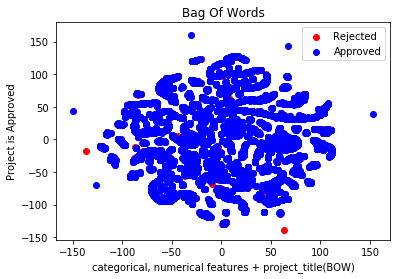

In [82]:
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
    
x = hstack((categories_one_hot, sub_categories_one_hot, title_bow, price_standardized)).todense()
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=20, learning_rate=1000)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])

for_tsne_r = for_tsne_df.loc[lambda for_tsne_df: for_tsne_df['Score'] == 0, :]
for_tsne_a = for_tsne_df.loc[lambda for_tsne_df: for_tsne_df['Score'] == 1, :]

r = plt.scatter(for_tsne_r['Dimension_x'], for_tsne_r['Dimension_y'], c='red')
a = plt.scatter(for_tsne_a['Dimension_x'], for_tsne_a['Dimension_y'], c='blue')

plt.title("Bag Of Words")
plt.xlabel("categorical, numerical features + project_title(BOW)")
plt.ylabel("Project is Approved")
plt.legend([r,a],['Rejected','Approved'])
plt.show()

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

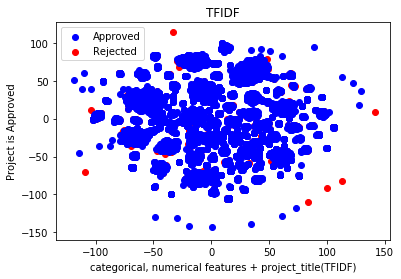

In [80]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


x = hstack((categories_one_hot, sub_categories_one_hot, text_tfidf, price_standardized)).todense()
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=20, learning_rate=1000)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])

for_tsne_r = for_tsne_df.loc[lambda for_tsne_df: for_tsne_df['Score'] == 0, :]
for_tsne_a = for_tsne_df.loc[lambda for_tsne_df: for_tsne_df['Score'] == 1, :]

r = plt.scatter(for_tsne_r['Dimension_x'], for_tsne_r['Dimension_y'], c='red')
a = plt.scatter(for_tsne_a['Dimension_x'], for_tsne_a['Dimension_y'], c='blue')

plt.title("TFIDF")
plt.xlabel("categorical, numerical features + project_title(TFIDF)")
plt.ylabel("Project is Approved")
plt.legend([a,r],['Approved','Rejected'])
plt.show()

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

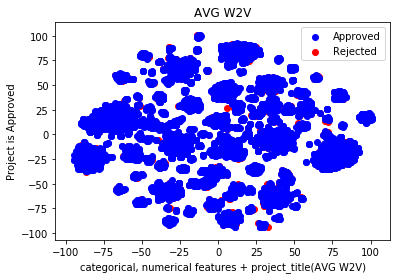

In [83]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label 

x = hstack((categories_one_hot, sub_categories_one_hot, tfidf_w2v_vectors, price_standardized)).todense()
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=20, learning_rate=1000)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])

for_tsne_r = for_tsne_df.loc[lambda for_tsne_df: for_tsne_df['Score'] == 0, :]
for_tsne_a = for_tsne_df.loc[lambda for_tsne_df: for_tsne_df['Score'] == 1, :]

r = plt.scatter(for_tsne_r['Dimension_x'], for_tsne_r['Dimension_y'], c='red')
a = plt.scatter(for_tsne_a['Dimension_x'], for_tsne_a['Dimension_y'], c='blue')

plt.title("AVG W2V")
plt.xlabel("categorical, numerical features + project_title(AVG W2V)")
plt.ylabel("Project is Approved")
plt.legend([a,r],['Approved','Rejected'])
plt.show()

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

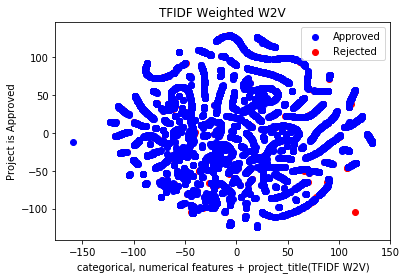

In [85]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label 
x = hstack((categories_one_hot, sub_categories_one_hot, title_tfidf_w2v_vectors, price_standardized)).todense()
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=20, learning_rate=1000)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])

for_tsne_r = for_tsne_df.loc[lambda for_tsne_df: for_tsne_df['Score'] == 0, :]
for_tsne_a = for_tsne_df.loc[lambda for_tsne_df: for_tsne_df['Score'] == 1, :]

r = plt.scatter(for_tsne_r['Dimension_x'], for_tsne_r['Dimension_y'], c='red')
a = plt.scatter(for_tsne_a['Dimension_x'], for_tsne_a['Dimension_y'], c='blue')

plt.title("TFIDF Weighted W2V")
plt.xlabel("categorical, numerical features + project_title(TFIDF W2V)")
plt.ylabel("Project is Approved")
plt.legend([a,r],['Approved','Rejected'])
plt.show()

<h2> 2.5 Summary </h2>

** TSNE Observations **

Note: Have used 10K records picked in continous order

1. Looking at all four graphs, at a quick glance, can make out that all four are graphs are similar with very little difference
2. There is no significant difference between select and non-selected cases
3. The data is too intricately coupled, there is hardly any difference between selected and non-selected projects